# Welcome to Convolutional Neural Networks!

---

ECT* TALENT Summer School 2020

*Dr. Michelle P. Kuchera*

*Davidson College*


<!-- I read it's useful to add a bit of personal information when teaching virtual classes -->

## Research interests:

 - ### Machine learning to address challenges in nuclear physics (and high-energy physics)
 - FRIB experiments
 - Jefferson Lab experiments
 - Jefferson Lab Theory Center
 
 -----
 


# Convolutional Neural Networks: Convoution Operations

<!-- 1943 -- McCullough and Pitts computational model of a neuron -->
The convolutional neural network architecture was first described by Kunihiko Fukushima in 1980 (!). 

*Discrete convolutions* are matrix operations that can, amongst other things, be used to apply *filters* to images. Convolutions (continuous) we first published in 1754 (!!).

 - In this session, we will be looking at *predefined* filters for images to gain an intuition or understanding as to how the convolutional filters look. 
 - In the next session, we will add them into a neural network architecture to create convolutional neural networks.

Given an image `A` and a filter `h` with dimensions of $(2\omega+1) \times (2\omega+1)$, the discrete convolution operation is given by the following mathematics:

$$C=x\circledast h$$

where

$$C[m,n] = 􏰅 \sum_{j=-\omega}^{\omega}\sum_{i=-\omega}^{\omega} h[i+\omega,j+\omega]* A[m+i,n+j]$$

Or, graphically:

![conv](conv.png)


## Details

 * The filter slides across the image and down the image.
 * *Stride* is how many elements (pixels) you slide the filter by after each operation. This affects the dimensionality of the output of each image.
 * There are choices to be made at the edges.
    - for a stride of $1$ and a filter dimension of $3$, as shown here, the outer elements can not be computed as described.
    - one solution is *padding*, or adding zeros around the outside of the image so that the output can maintain the same shape

Now, I will demonstrate the application of discrete convolutions of known filters on an image.

First, we `import` our necessary packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Now, let's define a function to execute the above operation for any given 2-dimensional image and filter matrices:

In [2]:
def conv2d(img, filt, stride):

    n_rows = len(img)
    n_cols = len(img[0])
    filt_w = len(filt)
    filt_h = len(filt[0])
    
    #store our filtered image
    new_img = np.zeros((n_rows//stride+1,n_cols//stride+1))
  
    # print(n_rows,n_cols,filt_w,filt_h) # uncomment for debugging


    for i in range(filt_w//2,n_rows-filt_w//2, stride):
        for j in range(filt_h//2,n_cols-filt_h//2, stride):
           
            new_img[i//stride,j//stride] = np.sum(img[i-filt_w//2:i+filt_w//2+1,j-filt_h//2:j+filt_h//2+1]*filt)
           
    return new_img
                                                                                         



We will first generate a simple synthetic image to which we will apply filters:

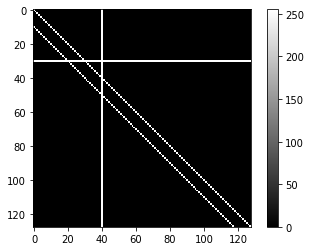

In [3]:
test_img = np.zeros((128,128)) # make an image 128x128 pixels, start by making it entirely black
test_img[30,:] = 255 # add a white row
test_img[:,40] = 255 # add a white column

# add two diagonal lines
for i in range(len(test_img)):
    for j in range(len(test_img[i])):
        if i == j or i == j+10:
            test_img[i,j] = 255
plt.imshow(test_img, cmap="gray")
plt.colorbar()
plt.show()



### Let's also investigate the inverse of this image:

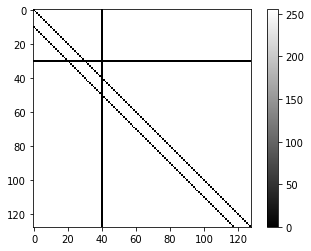

In [4]:
# creating the inverse of test_img
test_img2 = 255 - test_img
plt.imshow(test_img2, cmap="gray")
plt.colorbar()
plt.show()

### We will create three filters:

In [5]:
size = 3 # number of rows and columns for filters

# modify all values
filter1 = np.zeros((size,size))
filter1[:,:] = 0.5

# all values -1 except horizonal stripe in center
filter2 = np.zeros((size,size))
filter2[:,:] = -1
filter2[size//2,:] = 2

# all values -1 except vertical stripe in center
filter3 = np.zeros((size,size))
filter3[:,:] = -1
filter3[:,size//2] = 2

print(filter1,filter2,filter3, sep="\n\n")

[[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]

[[-1. -1. -1.]
 [ 2.  2.  2.]
 [-1. -1. -1.]]

[[-1.  2. -1.]
 [-1.  2. -1.]
 [-1.  2. -1.]]


### And now we call our function `conv2d` with our test images and our first filter:

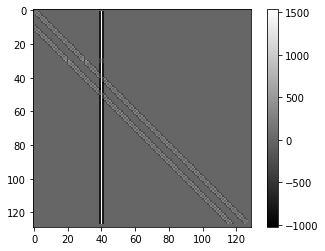

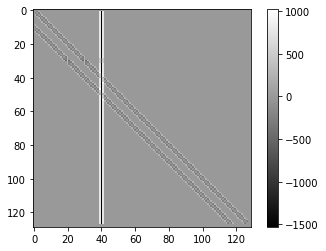

In [6]:
filtered_image = conv2d(test_img, filter3,1)
plt.imshow(filtered_image, cmap="gray")   
plt.colorbar()
plt.show()
filtered_image2 = conv2d(test_img2, filter3,1)
plt.imshow(filtered_image2, cmap="gray")   
plt.colorbar()
plt.show()

In practice, you do not have to code the 2d convolutions (or you can do it in a more vectorized way using the full power of `numpy`).

Let's look at the 2d convolutional method from `scipy`. The `mode="same"` argument indicates that our output matrix should match our input matrix.



Note that he following import statement was executed at the beginning of this notebook:

```python
from scipy import signal
```

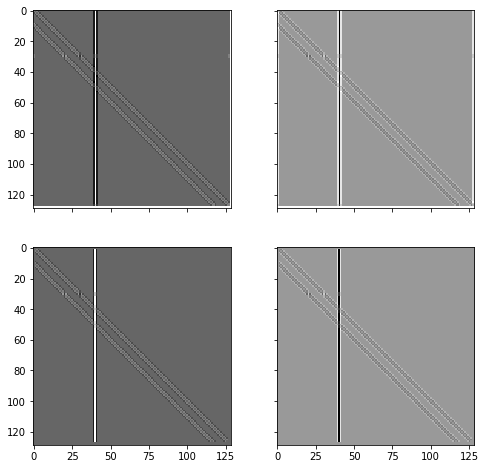

In [8]:
spy_image = signal.convolve2d(test_img, filter3, mode="same")
spy_image2 = signal.convolve2d(test_img2, filter3, mode="same")


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharex=True, sharey=True, figsize = (8,8))

ax1.imshow(spy_image, cmap="gray")
#plt.colorbar()
#plt.show()

ax2.imshow(spy_image2, cmap="gray")
#plt.colorbar()
#fig.add_subplot(f1)
#plt.show()
ax3.imshow(filtered_image, cmap="gray")
ax4.imshow(filtered_image2, cmap="gray")

plt.show()

## Filter 1 is a *blurring* filter. 

It takes an "average" of all of the pixels in the region of the filter, all with the same weight.

#### Let's go back and investigate the other filters.

## Filter 1 is a *blurring* filter. 

It takes an "average" of all of the pixels in the region of the filter, all with the same weight.

## Filter 2 detects horizontal lines. 

It takes an "average" of all of the pixels in the region of the filter, all with the same weight.

## Filter 3 detects vertical lines. 

It takes an "average" of all of the pixels in the region of the filter, all with the same weight.


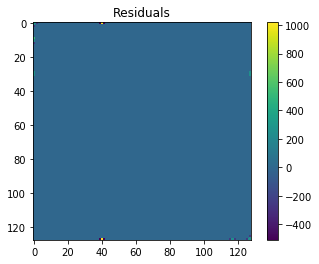

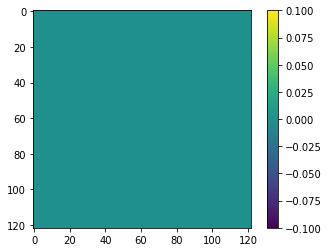

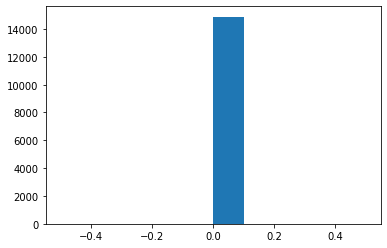

number of non-zero residuals (removing with of filter all the away around the image): 0


In [10]:
residuals = spy_image-filtered_image[:-1,:-1]
plt.imshow(residuals)  
plt.title("Residuals")
plt.colorbar()
plt.show()
plt.imshow(residuals[len(filter1):-len(filter1),len(filter1[0]):-len(filter1[0])])
plt.colorbar()
plt.show()
plt.hist(residuals[len(filter1):-len(filter1),len(filter1[0]):-len(filter1[0])].flatten())
plt.show()
print("number of non-zero residuals (removing with of filter all the away around the image):", np.count_nonzero(residuals[len(filter1):-len(filter1),len(filter1[0]):-len(filter1[0])].flatten()))         
plt.show()





### Let's try with a real photograph.

Since we have only defined 2D convolutions for a 2D matrix, we cannot apply our function to color images, which have three channels: (red (R), green (G), blue (B)).

Therefore, we make a gray scale image by averaging over the three <font color="red">R<font color="green">G<font color="blue">B <font color="black">channels.

In [ ]:
house = plt.imread("house_copy.jpg", format="jpeg")

plt.imshow(house)
plt.show()


bw_house = np.mean(house, axis=2)

plt.imshow(bw_house, cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
spy_image = signal.convolve2d(bw_house, filter1, mode="same")
plt.imshow(spy_image, cmap="gray")
plt.colorbar()
plt.show()
spy_image = signal.convolve2d(bw_house, filter2, mode="same")
plt.imshow(spy_image, cmap="gray")
plt.colorbar()
plt.show()
spy_image = signal.convolve2d(bw_house, filter3, mode="same")
plt.imshow(spy_image, cmap="gray")
plt.colorbar()
plt.show()

We can look at the effects of modifying the *stride*


In [ ]:
my_conv = conv2d(bw_house,filter3,5)
plt.imshow(my_conv)

# $N$-D convolutions

The mathmatics of discrete convolutions are the same no matter the dimensionality. 

Let's first look at 1D convolutions:

Given a 1-D data array `a` and a filter `h` with dimensions of $2\omega \times 2\omega$, the discrete convolution operation is given by the following mathematics:

$$c[n]=a[n]\circledast h= 􏰅 \sum_{i=-\omega}^{\omega} a[i+n]* h[i+\omega]$$
<!-- $$C[m,n]=x[m,n]\circledast h= 􏰅 \sum_{j=-\omega}^{\omega}\sum_{i=-\omega}^{\omega} h[i+\omega,j+\omega]* A[m+i,n+j]$$-->



Or, graphically:


![conv](conv1d.png)



In [ ]:
def conv1d(arr, filt, stride):

    n = len(arr)
    filt_w = len(filt)
    
    #store our filtered image
    new_arr = np.zeros(n//stride+1)
  
    # print(n_rows,n_cols,filt_w,filt_h) # uncomment for debugging


    for i in range(filt_w//2,n-filt_w//2, stride):  
            new_arr[i//stride] = np.sum(arr[i-filt_w//2:i+filt_w//2+1]*filt)
           
    return new_arr


In [ ]:

from random import random
x = np.linspace(0,1,100)
y = np.sin(15*x)+2*x**2 + np.random.rand(len(x))
plt.plot(y)

Now, we define our filter:

In [ ]:
size = 5
f1 = np.zeros(size)
f1[:] = 0.5

print(f1)

And we convolve our image with our filter aand look at the output:

In [ ]:
new_array = conv1d(y,f1,1)
plt.plot(new_array)

We see that this is still a *blurring* filter, but we would perhaps think of it as a *smoothing* filter in the 2D case.

:: I hope you can see that this simply extends to any dimension.